# Hector Santana: Data 608 Final Project
## A study on Crypto Trading

### Library Imports

In [53]:
import pandas as pd
import numpy as np
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt

### API Calls and Data Preparation

In [54]:
url2 = "https://api.nomics.com/v1/currencies/ticker?key=m_023109940eb177bbb78f68f84f1d509115b7a741&ids=BTC,ETH,XRP&interval=1d,30d&convert=USD&per-page=100&page=1"

url = "https://api.nomics.com/v1/exchange-markets/ticker?key=m_023109940eb177bbb78f68f84f1d509115b7a741&interval=1d&currency=BTC,ETH,XRP&exchange=binance,gdax,gemini&per-page=100&page=1"

## Latest Price Call

price_data = urllib.request.urlopen(url2).read()

pricing_df = pd.io.json.read_json(price_data)
pricing_subset = pricing_df[['id','price','price_date']]

pricing_vol = pricing_df['1d'].apply(pd.Series)
pricing_vol['volume'] = pd.to_numeric(pricing_vol['volume'])
pricing_vol = pd.concat([pricing_df,pricing_vol],axis=1)

## Market Data Call

market_data = urllib.request.urlopen(url).read()

market_df = pd.io.json.read_json(market_data )

market_df.columns

market_df.head()

market_subset = market_df[['exchange','type','base','price','last_updated']].copy(deep=True)


### DataFrame Construction

In [55]:
# Volume Dataframe
oneday_volume_df = market_df['1d'].apply(pd.Series)

# unified dataframe
unified_df = pd.concat([market_subset,oneday_volume_df],axis=1)
unified_df['trades'] = pd.to_numeric(unified_df['trades'])
unified_df['volume'] = pd.to_numeric(unified_df['volume'])

### Viz Function

In [56]:

def price_viz_constructor(coin,asset_type):
    sns.scatterplot(x='exchange',y='price',data=market_subset[(market_subset['base']==coin)&(market_subset['type']==asset_type)],hue='base').set(title='Price (USD) Analysis')    
    plt.axhline(pricing_subset[pricing_subset['id']==coin][['price']].values,color='r',label='Market_Price')
    plt.axhline(np.mean(market_subset[(market_subset['base']==coin)&(market_subset['type']==asset_type)]).values,color='b',label='Average_Trade_Price')
    plt.legend()
    plt.show()


def arb_calc(coin,asset_type):
    return pricing_subset[pricing_subset['id']==coin][['price']].values-np.mean(market_subset[(market_subset['base']==coin)&(market_subset['type']==asset_type)]).values


def vol_viz_constructor(coin,asset_type):
    
    sns.scatterplot(x='exchange',y='volume',data=unified_df[(unified_df['base']==coin)&(unified_df['type']==asset_type)],hue='base').set(title='Volume Analysis')
    
    plt.axhline(pricing_vol[pricing_vol['id']==coin][['volume']].values,color='r',label='Market_Vol')
    plt.axhline(np.mean(unified_df[(unified_df['base']==coin)&(unified_df['type']==asset_type)][['volume']]).values,color='b',label='Average_Exchange_Vol')
    plt.legend()
    plt.show()


C:\Users\hsantana\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


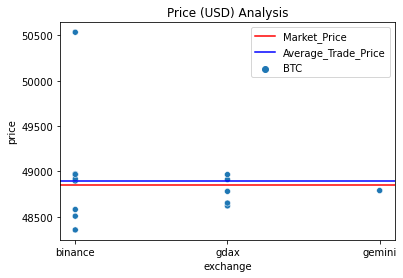

In [57]:
price_viz_constructor('BTC','spot')

C:\Users\hsantana\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


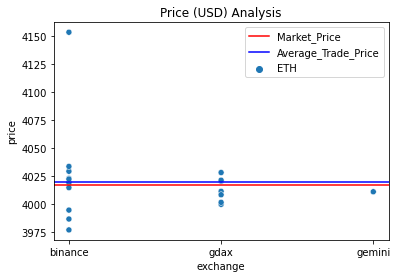

In [58]:
price_viz_constructor('ETH','spot')

C:\Users\hsantana\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


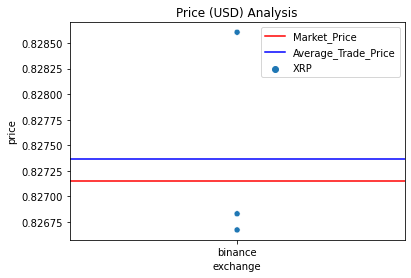

In [59]:
price_viz_constructor('XRP','spot')

In [60]:
arb_calc('BTC','spot')

array([[-38.41878679]])

In [61]:
arb_calc('ETH','spot')

array([[-2.89212401]])

In [62]:
arb_calc('XRP','spot')

array([[-0.00021732]])

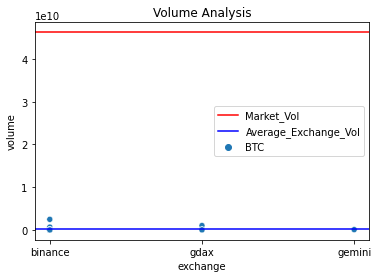

In [63]:
vol_viz_constructor('BTC','spot')

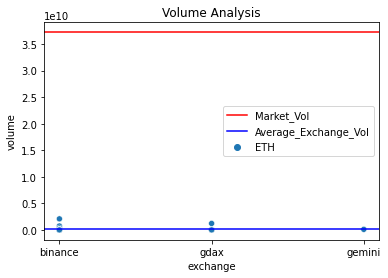

In [64]:
vol_viz_constructor('ETH','spot')

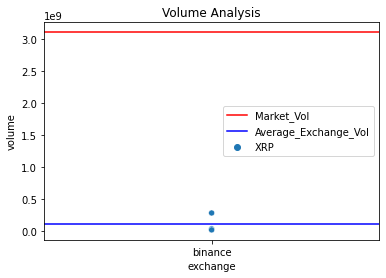

In [65]:
vol_viz_constructor('XRP','spot')

### Based on this analysis of four popular exchanges, I confirmed my hypothesis related to existing arbitrage opportunities within the crypto space. Below are the primary three questions I sought answer:

-	Would mass global adoption force crypto markets to become efficient if they are inefficient?
    - Mass global adoption would not force efficiency. Based on my analysis of market volume versus exchange volume, crypto markets are hyper-fragmented. Centralized and decentralized exchanges are limited by their on-chain capabilities. Not all blockchains and sidechains are integrated on a single exchange, and this would cause a significant portion of volume and trade activity to be missed. The only way mass adoption could force converging price points is if trades can seamlessly operate across any exchange with minimal friction.
-	Is inefficiency due to the rapid pace at which the DeFi world is growing?
    - Yes, the pace at which the DeFi world is growing is causing mass fragmentation. The inability to integrate all existing DeFi technologies will continue to create DeFi market inefficiencies and exasperate market volatilities.
-	If it is efficient, does efficiency occur instantaneously or does the opportunity for arbitrage present itself?
    - Efficiency is never present in crypto markets. Price convergence never happens as it does in traditional markets. Devations can vary from a single unit to 100 units or more depending on the cryptocurrency and its own relative scaling. The impact is generally large. Traditional markets often have a .01 to .02 variation between markets and due to centralized trading prices on exchanges rapidly adjust.

### The crypto market inefficiencies will contribute to large scale inequalities. While the decentralized nature of the technology allows simplified banking for the global populace, the volatile, inefficient, and opaque nature of the technology will also cause financial strife. Wealthy players, similar to what is already occurring, will use predatory tactics to maximize the consumption of this universe. Much of the digital real estate will be owned by those who were already hyper-wealthy in traditional markets. Full-scale adoption at this point will be more harmful than good as there are too many shortcomings for cryptocurrencies to be used as a money in established countries. However, I do acknowledge that for emerging economies experiencing hyper-inflation and currency devaluation there will be a great benefit to adopting cryptocurrencies as a primary source of money.